# Script used to perform regression, trying to predict the number of attaccks per state, per year.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv('./part/DF1sthypTOT')

In [3]:
df.head()

,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,MilitaryExp,Area (sq. mi.),Population,Density,cnt
0,604.5970,51.276,AFG,1960,32.328512,4.000000e+07,739462.0,8255331.0,551.1210,2.252607e+10,647500.0,31056997.0,13.891572,0.0
1,160.4806,42.240,ALB,1960,62.254366,6.200000e+07,493982.0,1114818.0,151.0588,2.252607e+10,28748.0,3581655.0,55.962154,0.0
2,373.1320,49.671,DZA,1960,46.135122,1.451501e+09,3394205.0,7730687.0,323.2800,2.252607e+10,2381740.0,32930091.0,4.670910,0.0
3,565.4100,54.423,AGO,1960,32.984829,1.451501e+09,550013.0,4720831.0,500.8860,2.252607e+10,1246700.0,12127071.0,4.227837,0.0
4,255.1080,23.682,ARG,1960,65.215537,1.030000e+08,15177907.0,5441168.0,156.2470,2.252607e+10,2766890.0,39921833.0,7.452076,0.0


In [4]:
del df['CountryCode']

#### Let's define two metrics that we'll adopt
- TerritoryDefense: MilitaryExp / Area (sq. mi.)
- PopulationDefense: MS.MIL.MPRT.KD / Population

(Let's remind that "MS.MIL.MPRT.KD" is the arms import)

In [36]:
df['TerritoryDefense'] = df['MilitaryExp'] / df['Area (sq. mi.)']
df['PopulationDefense'] = df['MS.MIL.MPRT.KD'] / df['Population']

del df['Area (sq. mi.)']
del df['Population']
df.head(5)

,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,MilitaryExp,Density,cnt,TerritoryDefense,PopulationDefense
0,604.5970,51.276,1960,32.328512,4.000000e+07,739462.0,8255331.0,551.1210,2.252607e+10,13.891572,0.0,34789.294798,1.287955
1,160.4806,42.240,1960,62.254366,6.200000e+07,493982.0,1114818.0,151.0588,2.252607e+10,55.962154,0.0,783569.931176,17.310433
2,373.1320,49.671,1960,46.135122,1.451501e+09,3394205.0,7730687.0,323.2800,2.252607e+10,4.670910,0.0,9457.820073,44.078259
3,565.4100,54.423,1960,32.984829,1.451501e+09,550013.0,4720831.0,500.8860,2.252607e+10,4.227837,0.0,18068.555692,119.690985
4,255.1080,23.682,1960,65.215537,1.030000e+08,15177907.0,5441168.0,156.2470,2.252607e+10,7.452076,0.0,8141.295238,2.580042


In [37]:
df.dtypes

SP.DYN.AMRT.MA       float64
SP.DYN.CBRT.IN       float64
Year                   int64
SP.DYN.LE00.IN       float64
MS.MIL.MPRT.KD       float64
SP.URB.TOTL          float64
SP.RUR.TOTL          float64
SP.DYN.AMRT.FE       float64
MilitaryExp          float64
Density              float64
cnt                  float64
TerritoryDefense     float64
PopulationDefense    float64
dtype: object

In [38]:
df.describe()

,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,MilitaryExp,Density,cnt,TerritoryDefense,PopulationDefense
count,8332.000000,8332.000000,8332.000000,8332.000000,8.332000e+03,8.332000e+03,8.332000e+03,8332.000000,8.332000e+03,8332.000000,8332.000000,8.332000e+03,8332.000000
mean,272.179561,30.266526,1986.394263,62.783496,7.567164e+08,1.239030e+07,1.701561e+07,201.585695,1.063209e+10,127.890849,13.980317,3.263527e+06,982.443517
std,119.350842,13.111310,15.451916,11.539812,6.967680e+08,4.014069e+07,7.899701e+07,125.738548,2.517372e+10,408.424269,79.821789,1.419695e+07,2910.328947
min,63.413000,7.600000,1960.000000,19.265512,0.000000e+00,6.627000e+03,0.000000e+00,35.237000,0.000000e+00,0.025899,0.000000,0.000000e+00,0.000000
25%,181.038000,18.132250,1973.000000,54.157256,4.100000e+07,6.027640e+05,7.047972e+05,101.744000,1.251193e+08,14.799928,0.000000,5.086784e+02,2.486406
50%,253.323000,30.568000,1986.000000,65.661293,5.520000e+08,2.353876e+06,2.796390e+06,159.274400,1.744595e+09,44.792099,0.000000,6.305675e+03,27.335085
75%,345.762750,42.243000,2000.000000,71.766463,1.451501e+09,7.583542e+06,8.810947e+06,286.479750,2.252607e+10,110.261950,2.000000,1.379682e+05,287.829485
max,921.630000,57.637000,2013.000000,83.096098,5.566000e+09,7.216918e+08,8.701360e+08,799.382000,6.980000e+11,7791.053391,2852.000000,1.167154e+08,25753.642918


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aad05aef0>,
      dtype=object)

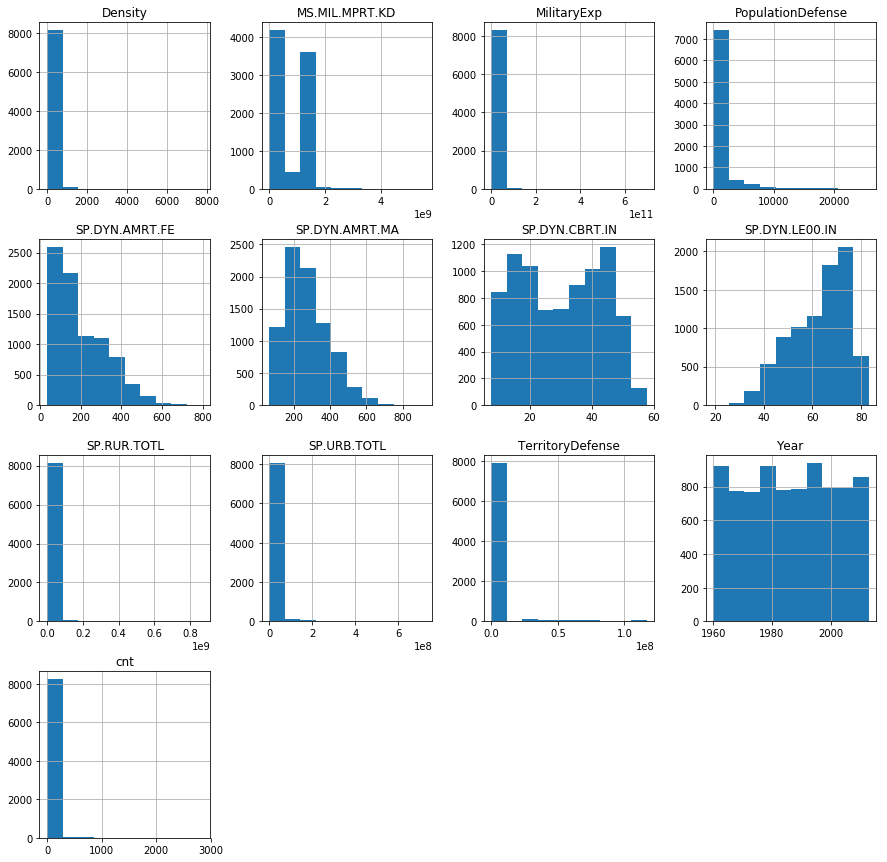

In [39]:
df.hist(figsize=(15,15))

In [241]:
df_std = df 

print('Shape of the df: ', df_std.shape)
print('Number of cnt = 0: ', df_std[df_std['cnt'] == 0].shape)

Shape of the df:  (8332, 13)
Number of cnt = 0:  (5526, 13)


#### We had a lot of values of cnt equal to zero. So we decided to delete all of them, focusing more on the other values of cnt.

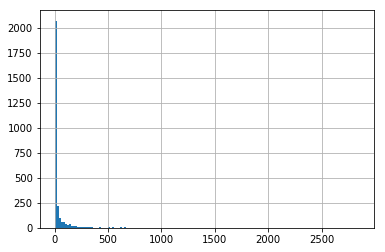

In [242]:
df_std = df_std[df_std['cnt'] > 0]
df_std['cnt'].hist(bins=150)

In [243]:
print('Shape of the df: ', df_std.shape)

Shape of the df:  (2806, 13)


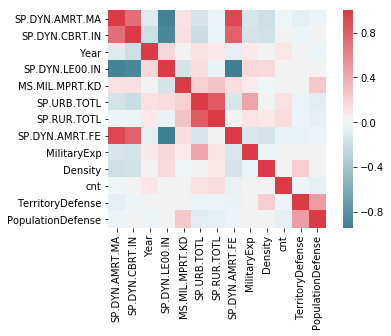

In [244]:
corr = df_std.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True)

In [245]:
del df_std['SP.RUR.TOTL']
del df_std['SP.DYN.AMRT.FE']
del df_std['SP.DYN.AMRT.MA']
del df_std['SP.DYN.LE00.IN']

#we deleted them because of collinearity.


In [246]:
del df_std['MilitaryExp']
del df_std['MS.MIL.MPRT.KD']

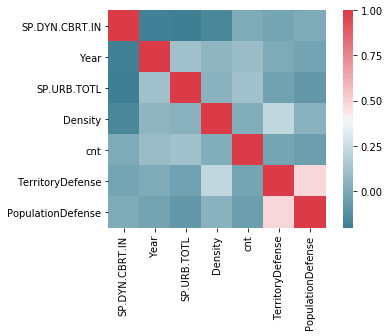

In [248]:
corr = df_std.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True)

In [249]:
from sklearn.model_selection import train_test_split

feature_matrix = df_std.loc[:, df_std.columns != 'cnt']
target_vector = df_std.cnt

x_train, x_test, y_train, y_test = train_test_split(feature_matrix, target_vector, test_size=0.2, random_state=1)

In [209]:
x_train.shape

(2244, 6)

In [210]:
x_test.shape

(562, 6)

We performed the scaling, using the mean-variance scaling.

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

x_train = pd.DataFrame(scale(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scale(x_test), index=x_test.index, columns=x_test.columns)
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [251]:
y_pred_train = model.predict(x_train)

In [252]:
y_pred_test = model.predict(x_test)

In [253]:
from sklearn import metrics

R2_base = metrics.r2_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average')
R2 = metrics.r2_score(y_test, y_pred_test, sample_weight=None, multioutput='uniform_average')

print("R2 on train: ", R2_base)
print("R2 on test: ", R2)

R2 on train:  0.028410993996022982
R2 on test:  0.019085305061902536


In [254]:
coefficients = pd.Series(model.coef_, index=x_train.columns)
print('Coefficients: ')
print(coefficients)

Coefficients: 
SP.DYN.CBRT.IN        7.165733
Year                 12.051524
SP.URB.TOTL          15.812951
Density               3.040962
TerritoryDefense     -0.861661
PopulationDefense    -5.430345
dtype: float64


The results using the regression are so bad, so we tried with a polynomial model.

## Polynomial models applying k-Fold CV and Ridge regularization

In [230]:
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures as pol
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from statistics import mean 
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2) # we are setting 7 folds
feature_matrix=df_std.loc[:, df_std.columns != 'cnt']
target_vector=df_std['cnt']
MSE_tr, MSE_te = [], []
R2_tr, R2_te = [], []
kMSE_tr, kMSE_te = [],  []
kR2_tr, kR2_te = [], []
degrees = [1,2,3,4] # list of different degrees of freedom
for degree in degrees: # cycle which applies the different degrees of freedom
    for train_index, test_index in kf.split(feature_matrix): # cycle that performs KCV on a certain polynomial model
        x_train, x_test = feature_matrix.iloc[train_index], feature_matrix.iloc[test_index]
        y_train, y_test = target_vector.iloc[train_index], target_vector.iloc[test_index]

        x_train = pd.DataFrame(scale(x_train), index=x_train.index, columns=x_train.columns) # standardization
        #y_train = pd.DataFrame(scale(y_train), index=y_train.index).to_numpy() # standardization
        x_test = pd.DataFrame(scale(x_test), index=x_test.index, columns=x_test.columns) # standardization
        #y_test = pd.DataFrame(scale(y_test), index=y_test.index).to_numpy() # standardization

        model = make_pipeline(pol(degree), RidgeCV(alphas=(0.01,1.0,100), cv=4))
        x = model.fit(x_train, y_train.ravel())
        y_pred_on_training=model.predict(x_train)
        y_pred=model.predict(x_test)
        MSE_tr.append(metrics.mean_squared_error(y_train, y_pred_on_training, sample_weight=None, multioutput='uniform_average'))
        MSE_te.append(metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
        R2_tr.append(metrics.r2_score(y_train, y_pred_on_training, sample_weight=None, multioutput='uniform_average'))
        R2_te.append(metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
    kMSE_tr.append(mean(MSE_tr))
    kMSE_te.append(mean(MSE_te))
    kR2_tr.append(mean(R2_tr))
    kR2_te.append(mean(R2_te))
    MSE_tr = []
    MSE_te = []
    R2_tr = []
    R2_te = []
print('kMSE on training, from degree 1 to 4:\n', kMSE_tr)
print('\nkMSE on testing, from degree 1 to 4:\n', kMSE_te)
print('\nkR2 on training, from degree 1 to 4:\n', kR2_tr)
print('\nkR2 on testing, from degree 1 to 4:\n', kR2_te)

kMSE on training, from degree 1 to 4:
 [17251.41127988564, 15859.140805775103, 13894.671863571988, 11987.420135370496]

kMSE on testing, from degree 1 to 4:
 [17286.12907679797, 16109.113725673902, 15961.753059309394, 37408.6690440835]

kR2 on training, from degree 1 to 4:
 [0.02925243161163584, 0.10768917129900388, 0.2184565229264959, 0.3260363221507227]

kR2 on testing, from degree 1 to 4:
 [0.02382420537148302, 0.08918703976116527, 0.08471071661256876, -1.4240913272586915]


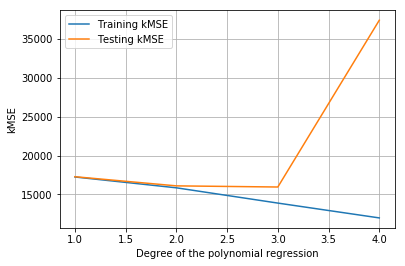

In [231]:
plt.plot(degrees, kMSE_tr, label='Training kMSE')
plt.plot(degrees, kMSE_te, label='Testing kMSE')
plt.xlabel('Degree of the polynomial regression')
plt.ylabel('kMSE')
plt.legend()
plt.grid()

plt.show()

In [24]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Ridge
#import yellowbrick
#from yellowbrick.regressor import ResidualsPlot

#model = make_pipeline(pol(2), RidgeCV(alphas=(0.01,1.0,100), cv=4))

# Instantiate the linear model and visualizer

#visualizer = ResidualsPlot(model)

#visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(x_test, y_test)  # Evaluate the model on the test data
#visualizer.show()                 # Finalize and render the figure

The best model was the polynomial with grade 3, resulting in a R2train = 0,30 and a R2test = 0,25. The results are still bad, so we decided to re-formulate the problem, passing to a classification problem.

In [255]:
df_class = df_std.rename(columns={'cnt':'conto'})

#### We are going to divide the data in 3 groups. 

Low number of attacks: 0 < cnt < 3

Medium number of attacks: 3 <= cnt < 15

High number of attacks: cnt >= 15

The splitting was made considering the fact that each cathegory had to be a good amount of sample.

In [256]:
df_class.groupby(by='conto').aggregate({'conto':'count'})

df_class['conto'] = df_class['conto'].apply(lambda x: 0 if (x > 0 and x < 3) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -1 if (x >= 3 and x < 15) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: -2 if (x >= 15) else x)

df_class['conto'] = df_class['conto'].apply(lambda x: 1 if (x == -1) else x)
df_class['conto'] = df_class['conto'].apply(lambda x: 2 if (x == -2) else x)

df_class = df_class.rename(columns={'conto':'cnt'})

df_class

,SP.DYN.CBRT.IN,Year,SP.URB.TOTL,Density,cnt,TerritoryDefense,PopulationDefense
1544,22.759,1970,18909951.0,8.664263,2.0,1.610884e+02,6.337384
1547,20.600,1970,10664094.0,1.627064,0.0,1.661747e+02,11.843616
1554,14.700,1970,9061057.0,316.285017,0.0,2.449407e+04,50.871625
1558,42.261,1970,1792217.0,4.101453,0.0,1.528076e+01,0.222493
1560,35.214,1970,53662830.0,11.276180,1.0,1.205637e+02,1.164409
1566,17.400,1970,16132459.0,2.135674,0.0,1.892058e+02,18.459810
1570,37.506,1970,12093958.0,19.370463,0.0,1.428229e+02,0.091758
1580,41.750,1970,1810657.0,92.409481,0.0,7.367125e+02,0.108885
1582,40.130,1970,14437563.0,34.758200,0.0,1.090917e+03,22.906180
1587,48.075,1970,2440280.0,25.210113,1.0,3.064428e+01,1.190190


Here we can see that each class has a good amount of samples.

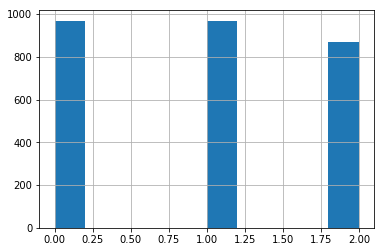

In [234]:
df_class.cnt.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa47d7160>,
      dtype=object)

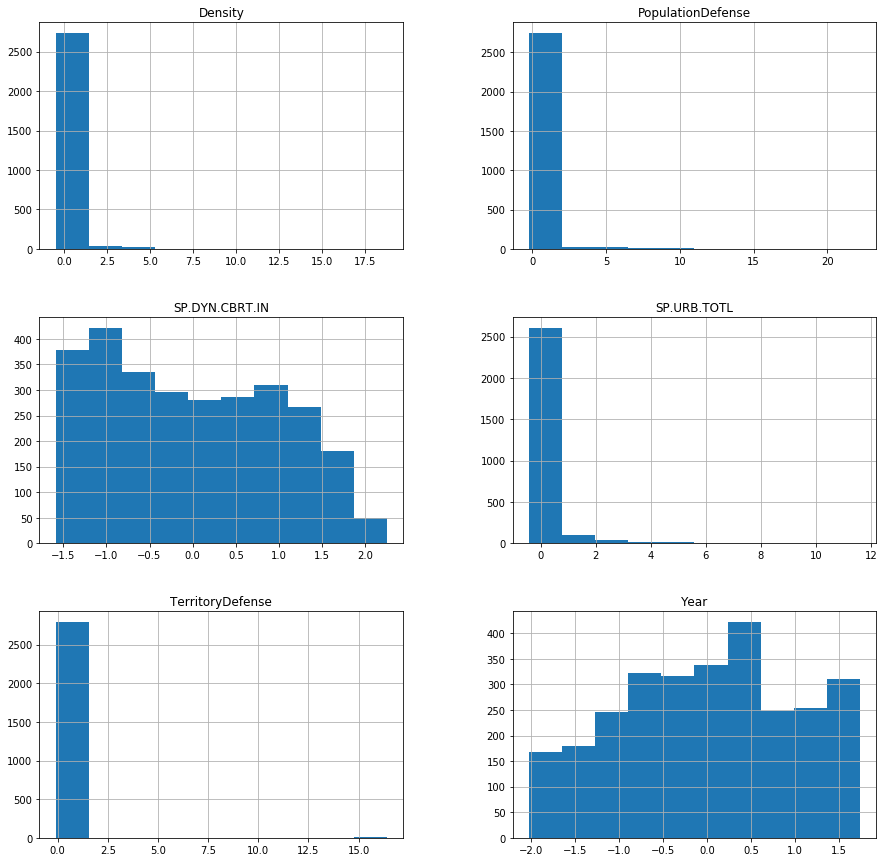

In [257]:
from sklearn.preprocessing import scale

feature_matrix=df_class.loc[:, df_std.columns != 'cnt']
target_vector=df_class['cnt']
feature_matrix = pd.DataFrame(scale(feature_matrix), index=feature_matrix.index, columns=feature_matrix.columns) # standardization
feature_matrix.hist(figsize=(15,15))



In [264]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_matrix, target_vector, test_size=0.2, random_state=1)

We first try with multinomial logistic regression

In [265]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,random_state=1, max_iter=10000, multi_class='multinomial',solver ='newton-cg').fit(x_train, y_train)
clf.predict(x_train)
print(clf.score(x_train,y_train))

clf.predict(x_test)
print(clf.score(x_test,y_test))

0.43137254901960786
0.42170818505338076


After we try with multi-layer perceptron

In [260]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
print('train accuracy: ', accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(x_test)
print('test accuracy: ', accuracy_score(y_test, y_pred_test))


train accuracy:  0.5980392156862745
test accuracy:  0.5854092526690391


The results are quite better than the regression case.

In [196]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred_train)

array([[439, 261,  69],
       [230, 426, 133],
       [ 65, 144, 477]])

In [197]:
confusion_matrix(y_test, y_pred_test)

array([[108,  71,  21],
       [ 48,  97,  35],
       [ 17,  41, 124]])

##### We try to compare our classifier with a classifier that chooses randomly the class. 2364 training samples, 592 testing samples.

In [270]:
np.random.seed(5)

y_pred_train = np.random.randint(0,3,size=2244)
print('train accuracy: ', accuracy_score(y_train, y_pred_train))

y_pred_test = np.random.randint(0,3,size=562)
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.339572192513369
test accuracy:  0.3185053380782918


In [271]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[64, 66, 70],
       [64, 65, 51],
       [71, 61, 50]])

Mean of all features and output from 1990 (included) until 2018

In [299]:
df2 = df[df['Year']>1989]
df3 = df2.groupby(['CountryCode', 'Year']).mean()
df3.groupby(['CountryCode']).mean().head(5)

,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,MilitaryExp,Area (sq. mi.),Population,Density,cnt
CountryCode,,,,,,,,,,,,
ABW,133.929875,14.075208,74.085162,1.451501e+09,4.126025e+04,4.864142e+04,83.852750,2.252607e+10,193.0,71891.0,465.811744,0.000000
AFG,334.655458,45.270125,55.537152,9.657922e+08,4.800440e+06,1.658458e+07,289.376792,1.323066e+10,647500.0,31056997.0,33.027058,246.750000
AGO,426.957708,50.182292,46.167943,3.691461e+08,5.729064e+06,1.070502e+07,371.574500,1.673566e+09,1246700.0,12127071.0,13.182071,17.750000
ALB,120.919925,17.924417,74.640703,1.091209e+09,1.354789e+06,1.716374e+06,61.268892,1.972513e+09,28748.0,3581655.0,106.830482,2.916667
ARE,109.525042,16.529375,74.698522,7.940000e+08,3.627165e+06,7.782639e+05,83.378167,1.357714e+10,82880.0,2602713.0,53.154304,0.250000
